<br>
<body>
    <p style="font-size:30px;text-align:center; color:#004475">TP2 : Linear regression </p><br>
    <p style="font-size:20px;text-align:center; color:#004475">Author : Anna van Elst</p><br>
</body>
<br>
<br>

## Format your filename

In [1]:
# Change here using YOUR own first and last names
fn1 = "anna"
ln1 = "vanelst"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print("Filename : ",filename)

Filename :  sd-tsia204_lab2_vanelst_anna.ipynb


## Imports necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.axes import Axes
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

## 1. Proprocess the data

In [3]:
#set the random seed to 0
np.random.seed(0)
# load the data
path = './Downloads/data_dm3_sd204.csv'
data = pd.read_csv(path, sep=',', header= None)
print("The shape of the data : ",data.shape)# 210 covariates and 442 observations

The shape of the data :  (442, 211)


In [4]:
# print the mean of every covariate
for i in range(210):
    print(f'Mean of the {i+1}th covariate : {data[i].mean()}')

#print the standard deviation of every covariate
for i in range(210):
    print(f'Standard deviation of the {i+1}th covariate : {data[i].std()}')

Mean of the 1th covariate : 7.535450393383416e-19
Mean of the 2th covariate : -1.507090078676683e-17
Mean of the 3th covariate : 5.494599245175407e-20
Mean of the 4th covariate : -7.284268713603969e-18
Mean of the 5th covariate : 8.288995432721757e-18
Mean of the 6th covariate : -2.7127621416180295e-17
Mean of the 7th covariate : 1.9717761862686605e-17
Mean of the 8th covariate : 8.540177112501205e-18
Mean of the 9th covariate : 1.0298448870957335e-17
Mean of the 10th covariate : 4.018906876471155e-18
Mean of the 11th covariate : -1.4442946587318214e-17
Mean of the 12th covariate : 3.717488860735818e-17
Mean of the 13th covariate : -3.642134356801984e-17
Mean of the 14th covariate : -1.1240380170130261e-17
Mean of the 15th covariate : -3.750456456206871e-17
Mean of the 16th covariate : -4.51185092303832e-17
Mean of the 17th covariate : 2.4615804618385823e-17
Mean of the 18th covariate : 9.293722151839545e-18
Mean of the 19th covariate : 2.6625258056621402e-17
Mean of the 20th covariate

### Is the data centered?
The mean of each covariate is not equal to zero so the data is not centered. However, the mean is very close to zero so it can be considered centered if we approximate e-15 to zero.

In [5]:
#check if the explorary variables are centered with a certain threshold
print("Is the mean of the data close to zero (T/F) ?", all(abs(data.iloc[:,:210].mean()) < 10**(-15)))

Is the mean of the data close to zero (T/F) ? True


### Is the data normalized?
The data is normalized if the minimum value is 0 and the maximum vaue is 1. Therefore, the data is not normalized.

In [6]:
# print the minimum of each covariate
for i in range(210):
    print(f'Minimum of the {i+1}th covariate : {data[i].min()}')
    
# print the maximum of each covariate
for i in range(210):
    print(f'Maximum of the {i+1}th covariate : {data[i].max()}')

Minimum of the 1th covariate : -3.1492473959657854
Minimum of the 2th covariate : -2.8628706902090446
Minimum of the 3th covariate : -3.057543352397936
Minimum of the 4th covariate : -2.8569030619862397
Minimum of the 5th covariate : -3.102346978126337
Minimum of the 6th covariate : -2.7823440257888707
Minimum of the 7th covariate : -2.8253184095506234
Minimum of the 8th covariate : -3.626525413384108
Minimum of the 9th covariate : -2.8340069321972146
Minimum of the 10th covariate : -2.695860664623068
Minimum of the 11th covariate : -3.512743687026165
Minimum of the 12th covariate : -2.8628843673413744
Minimum of the 13th covariate : -2.5148160167691342
Minimum of the 14th covariate : -2.6992636142994115
Minimum of the 15th covariate : -3.017825693644921
Minimum of the 16th covariate : -2.878606983549844
Minimum of the 17th covariate : -3.2055986452856926
Minimum of the 18th covariate : -2.6915918368861655
Minimum of the 19th covariate : -3.1509223667251
Minimum of the 20th covariate :

### Is the data standardized?
The data is standardized if the mean is zero and the standard deviation one so it is not standardized. However, with a certain threshold, the data can be considered standardized since the mean is very close to zero and the standard deviation very close to one.

In [7]:
# if the explorary variables are of standard deviation equal to zero (threshold = 0.01)
print("Is the standard deviation of the data close to one (T/F) ?", all(abs(data.iloc[:,:210].std()-1) < 0.01))

Is the standard deviation of the data close to one (T/F) ? True


In [8]:
#separate the data in two matrices X and Y
X = data.iloc[:, :210]
Y = data.iloc[:, 210]

#separate the covariate data in train and test sets. Save one fourth for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print("Size of the training set: ",X_train.shape[0])
print("Size of the test set: ",X_test.shape[0])

#Center and standardize the train and test data and plot its mean and variance again. 
#Use the functions fit_transform and transform.
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

#Check results
print("\nThe mean of X_train is :",X_train_s.mean())
print("The standard deviation of X_train is :",X_train_s.std())
print("\nThe mean of X_test is :",X_test_s.mean())
print("The standard deviation of X_test is :",X_test_s.std())

Size of the training set:  331
Size of the test set:  111

The mean of X_train is : 1.0222165670552441e-18
The standard deviation of X_train is : 1.0

The mean of X_test is : -0.008205614800002347
The standard deviation of X_test is : 1.01174088978772


The mean of X_train is very close to zero and the standard deviation to one. However, for X_test, it not exactly zero (mean) and one (standard deviation) which is not surprising because we had to transform the X_test data with the parameters computed with the X_train data.
<br>

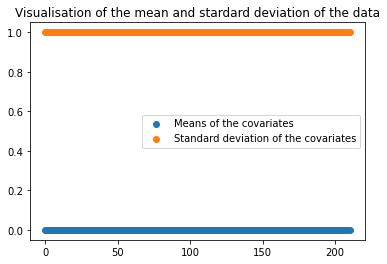

In [9]:
# Plot the median and the standard deviation for the covariates
n,p = data.shape
mean = X_train_s.mean(axis=0)
std = X_train_s.std(axis=0)
index_covariates = np.linspace(0, 210,210)
plt.figure()
plt.scatter(index_covariates, mean, label='Means of the covariates')
plt.scatter(index_covariates, std, label='Standard deviation of the covariates')
plt.title('Visualisation of the mean and stardard deviation of the data')
plt.legend()
plt.show()

In [10]:
#Create two empty dataFrames of names df_test and df_coef.
df_test = pd.DataFrame()
df_coef = pd.DataFrame()

## 2. Write a function to compute the determination coefficient and another to compute the mean squared error

Let $n$ be the number of observed variables, $Y$ the observed values, $\hat{Y}$ the predicted values.

The determination coefficient is given by $R^2 = 1 - \frac{SSR}{SST}$ where RSS is the sum of squares of residuals and TSS is the total sum of squares.

- The sum of squares of residuals, also called the residual sum of squares:
$$
SSR=\sum_{i=1}^n\left(y_{i}-\hat y_{i}\right)^{2}
$$

- The total sum of squares (proportional to the variance of the data):
$$
SST=\sum_{i}\left(y_{i}-\bar{y}\right)^{2}
$$
- The empiricall mean is given by :
$$\bar{y}=\frac{1}{n} \sum_{i=1}^{n} y_{i}$$


The MSE, mean squarred error, is given by $$MSE=\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$$


In [11]:
def determination_coefficient(Y, Y_pred):   
    """
    compute the determination coefficient
    """
    Y_bar = np.mean(Y)
    SSR = np.sum((Y-Y_pred)**2)
    SST = np.sum((Y - Y_bar)**2)
    return 1-(SSR/SST)

#mean squarred error
def MSE(Y, Y_pred):
    """
    compute the mean squarred error 
    """
    return np.mean((Y - Y_pred)**2)

## 3. Using sklearn utilities, fit a linear regression model on the train set that we will use as baseline.

We're going to apply the sklearn linear regression to the data.
The OLS (ordinary least squares) regression solves the following optimization problem: 
    
$$\hat{\theta}_n \in argmin ||Y-X\theta||_2^2$$

In [12]:
#apply the linear regression of the sklearn library to the train data
linReg = LinearRegression(fit_intercept=True)
linReg.fit(X_train_s, Y_train)
Y_pred = linReg.predict(X_test_s)

#print results
print("The score for the linear regression is : ", linReg.score(X_train_s, Y_train))
print("\nThe intercept is :", linReg.intercept_)
print("The mean of the coefficients is :", linReg.coef_.mean())

#print the determination coefficient and the MSE of the test data,
print("\nDetermination coefficient : ", determination_coefficient(Y_test, Y_pred))
print("Mean Squared Error : ", MSE(Y_test, Y_pred))

#check determination coefficient and MSE
print("\nSklearn Determination coefficient : ", r2_score(Y_test, Y_pred))
print("Sklearn Mean Squared Error : ", mean_squared_error(Y_test, Y_pred))

# add a column named OLS to the df_test dataframe that contains the predicted values for the sample
df_test['OLS'] = Y_pred

# add a column named OLS to the df_coef dataframe that contains the estimated coefficients.
df_coef['OLS'] = linReg.coef_

The score for the linear regression is :  0.5544787681557697

The intercept is : 152.38436233939817
The mean of the coefficients is : -57114324387853.84

Determination coefficient :  0.1542717012742577
Mean Squared Error :  4198.545070460195

Sklearn Determination coefficient :  0.1542717012742577
Sklearn Mean Squared Error :  4198.545070460194


On the one hand, the determination coefficient is very close to zero which means that the regression model dit not fit the observed data very well. On the other hand, the MSE is very high which indicates that the regression line is far from the set of points - the lower the MSE, the better the forecast. Our model needs to be improved.

## 4. Plot a heatmap of the covariance matrix. Compute the singular value decomposition of the covariance matrix

Let n be the number of observations. The formula of the covariance matrix is given by : 
$$C=\frac{1}{n-1} \sum_{i=1}^{n}\left(X_{i}-\bar{X}\right)\left(X_{i}-\bar{X}\right)^{T}$$
Each coefficient of the matrix indicates the level to which two variables vary together. 
Since X is centered, the covariance matrix is given by 
$$ \Sigma = \frac{X^TX}{n-1} $$

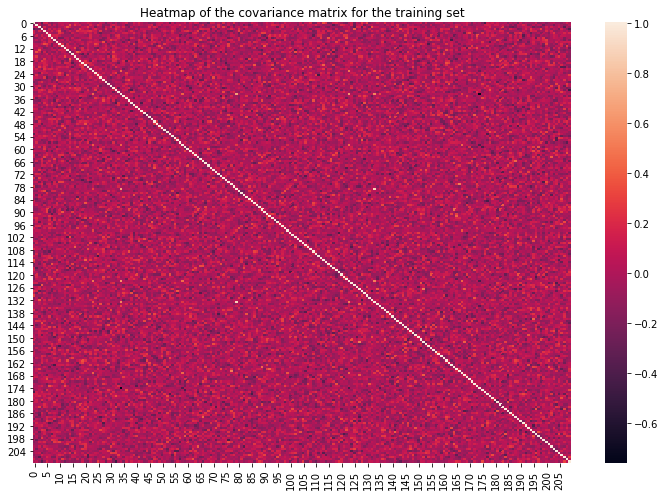

In [13]:
#plot heatmap of the covariance matrix
cov_matrix = np.cov(X_train_s.T)
plt.figure(figsize=(10,7))
ax = sns.heatmap(cov_matrix, annot=False)
plt.title('Heatmap of the covariance matrix for the training set')
plt.tight_layout()
plt.show()

We can see that the values on the diagonal are equal to 1 which is normal because the variances are standardized. Moreover, we can observe that most of the covariates are not correlated but there are some dark points and orange points which indicate that some variables are correlated. There is high correlation if the coefficient value lies between ± 0.50 and ± 1. The dark points show that they are some covariates that are highly correlated (since it is lower that -0.5).

Examining the covariance matrix is important because when building a regression model, it is advised to remove features that are high correlated (only keep one of them). This makes the model more stable, that is less sensitive to data.

### Singular value decomposition 

$X^TX = U s V ^{T}$, where
- $X^TX$ is the original matrix we want to decompose
- U is the left singular matrix (principal components). 
- s is a diagonal matrix containing singular (eigen)values
- V is the right singular matrix (principal axes). 

Thus, the singular value decomposition of the covariance matrix is given by $\Sigma = U \frac{s}{n-1} V ^{T}$ 

In [14]:
#Singular value decomposition of the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)
print("First eigenvalue : ", s[0])
print("Last eigenvalue : ", s[209])

First eigenvalue :  5.964953863334446
Last eigenvalue :  1.7411059633528376e-17


In [15]:
#Singular value decomposition of X.T@X
U, s, V = np.linalg.svd(X_train_s.T@X_train_s)
#Singular value decomposition of the covariance matrix
s = s/(n-1)
print("First eigenvalue : ", s[0])
print("Last eigenvalue : ", s[209])

First eigenvalue :  4.463570918141423
Last eigenvalue :  1.2896552783798996e-17


The methods for computing the singular value decomposition seem to give slightly different results. We can observe that the eigenvalues are all positive, which is what we expected since the covariance matrix is symetric positive definite.

## 5. Show that the $i$-th singular value of $X, \sigma_{i}$, and the $i$-th eigenvalue of the covariance matrix $(n-$ $1)^{-1} X^{\top} X, \lambda_{i}$, are related as follows $\lambda_{i}=(n-1)^{-1} \sigma_{i}^{2}$

$X^{\top} X$ is a real symmetric matrix so there exists an orthogonal matrix $V$ such that 
- $X^{\top} X=V D V^{\top}$
- $D=\operatorname{diag}\left(\alpha_{1}, \ldots, \alpha_{n}\right)$, $\alpha_{1}>\ldots \alpha_{n} \geqslant 0.$

$X^{\top} X=V \sqrt{D} U^{\top} U \sqrt{D} V$ where $U$ is orthogonal.

Let $\sum=\sqrt{D}=\operatorname{diag}\left(\sigma_{1},\ldots, \sigma_{n}\right)$ we have $X=U \sum V^{\top}$ and $\alpha_{i}=\sigma_{i}^{2}$
So $\lambda_{i}=\frac{\alpha_{i}}{n-1}=\frac{\sigma_{i}^{2}}{n-1}.$

## 6. Which is the variance explained by each component? Plot the projection of the data into the 1st and 2nd components.

Variance of PC1 :  5.9469328546838955
Variance of PC2 :  5.443907237521416

Explained variance ratio of PC1 in % :  2.8318727879447123
Explained variance ratio of PC2 in % :  2.5923367797721033


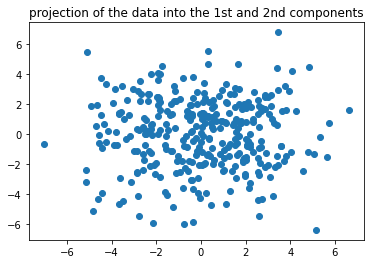

In [16]:
#Compute the first compononent PC1 and second component PC2
PC = X_train_s @ U
PC1 = PC[:, 0]
PC2 = PC[:, 1]

#What is the variance explained by each component ?
sigma_1 =  PC[:, 0].std()**2
sigma_2 =  PC[:, 1].std()**2
print("Variance of PC1 : ", sigma_1)
print("Variance of PC2 : ", sigma_2)

#Explained variance ratio
print("\nExplained variance ratio of PC1 in % : ", sigma_1/210 * 100)
print("Explained variance ratio of PC2 in % : ", sigma_2/210 * 100)

# Plot both components
plt.scatter(PC1,PC2)
plt.title("projection of the data into the 1st and 2nd components")
plt.show()

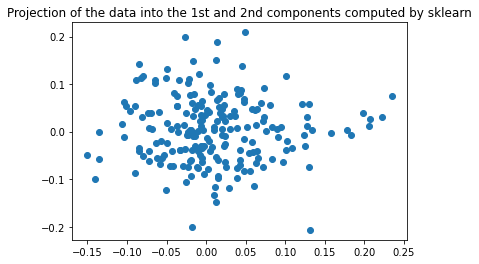

Explained variance ratio of PC1 and PC2 :  [2.83187279 2.59233678]


In [17]:
#Compare results with PCA from sklearn
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X_train_s)
plt.scatter(pca.components_[0], pca.components_[1])
plt.title("Projection of the data into the 1st and 2nd components computed by sklearn")
plt.show()
print("Explained variance ratio of PC1 and PC2 : ", pca.explained_variance_ratio_*100)

We can notice that the variance explained by the first component is greater than the one of the second component which is what we expected. The first component is indeed the one that maximizes that variance. 

Furthermore, we can notice that even though our graph and the sklearn graph don't look similar, the explained variance of both the first component and the second component are the same, which makes sense. 

Since that the first two components don't account for most of the variance in the data, we can't really interpret this plot in order to detect clusters, outliers, and trends. 

## 7. Explain what the loadings are in terms of the variance and plot them for the 1st and 2nd directions.


Loadings represent the correlations between the original variable and the principal components. 
Loadings are the product of the PCA components and the square root of the variance explained by each component. They describe how much each variable contributes to a particular principal component. Large loadings (positive or negative) indicate that a particular variable has a strong relationship to a particular principal component.

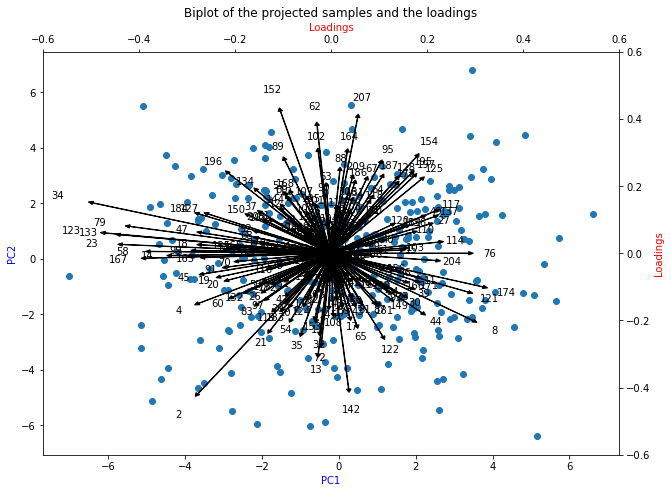

In [18]:
# compute loadings
loadings = U * np.sqrt(s)

# loadings dataframe
loadings_df = pd.DataFrame(
    loadings[:,:2],
    columns=["PC1", "PC2"],
    index=X_train.columns,
)

def loading_plot(coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5):
    """
    plot the loadings on the graph
    """
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )
            

fig = plt.figure(figsize=(10,7))
rect = 0.1, 0.1, 0.8, 0.8

#first axe
ax1 = fig.add_axes(rect)
ax1.scatter(PC1,PC2)
ax1.set_xlabel('PC1', color='b')
ax1.set_ylabel('PC2', color='b')

#second axe
ax2 = fig.add_axes(rect, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')

#plot loadings
loading_plot(loadings_df[["PC1", "PC2"]].values, loadings_df.index, scale=1, ax = ax2, arrow_size=0.01)
ax2.set_xlabel('Loadings', color='r')
ax2.set_ylabel('Loadings', color='r')
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.title("Biplot of the projected samples and the loadings")
plt.show()

We can use the loading plot to identify which variables have the largest effect on each component. A loading of over 0.5 or below -0.5 indicate the variable has a strong influence on the component. For instance, variables 34 and 123 have a strong influence on PC1. 

Loadings close to 0 indicate that the variable has a weak influence on the component. Most of the loadings are below 0.4 which means that they don't have a strong influence on PC1 and PC2. 

If we had higher loadings, we could have characterized each component in terms of the variables. However, in this case, the loadings plot doesn't give much information which what we expected given the low explained variance of PC1 and PC2.

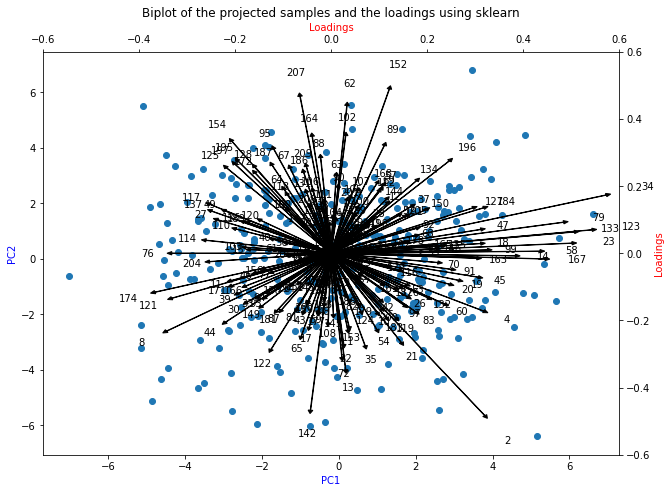

In [19]:
# compute loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# loadings dataframe
loadings_df = pd.DataFrame(
    loadings[:,:2],
    columns=["PC1", "PC2"],
    index=X_train.columns,
)

def loading_plot(coeff, labels, scale=1, colors=None, visible=None, ax=plt, arrow_size=0.5):
    """
    plot the loadings on the graph
    """
    for i, label in enumerate(labels):
        if visible is None or visible[i]:
            ax.arrow(
                0,
                0,
                coeff[i, 0] * scale,
                coeff[i, 1] * scale,
                head_width=arrow_size * scale,
                head_length=arrow_size * scale,
                color="#000" if colors is None else colors[i],
            )
            ax.text(
                coeff[i, 0] * 1.15 * scale,
                coeff[i, 1] * 1.15 * scale,
                label,
                color="#000" if colors is None else colors[i],
                ha="center",
                va="center",
            )
            

fig = plt.figure(figsize=(10,7))
rect = 0.1, 0.1, 0.8, 0.8

#first axe
ax1 = fig.add_axes(rect)
ax1.scatter(PC1,PC2)
ax1.set_xlabel('PC1', color='b')
ax1.set_ylabel('PC2', color='b')

#second axe
ax2 = fig.add_axes(rect, frameon=False)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')

#plot loadings
loading_plot(loadings_df[["PC1", "PC2"]].values, loadings_df.index, scale=1, ax = ax2, arrow_size=0.01)
ax2.set_xlabel('Loadings', color='r')
ax2.set_ylabel('Loadings', color='r')
plt.xlim(-0.6,0.6)
plt.ylim(-0.6,0.6)
plt.title("Biplot of the projected samples and the loadings using sklearn")
plt.show()

Even if the sklearn plot is slightly different from ours, we can observe that the same variables seem to have a strong influence on PC1. However, a symetry can be observed (PC1 to -PC1) between the two plots which is a bit surprising. This could be explained by the fact that there are two solutions when we take the square root of a number.

## 8. Apply the method "PCA before OLS"

PCA before OLS consists of transforming the data to a new coordinate system and keeping the first most significant components (here 60). This is allows to reduce the number of features used for the prediction.

In [20]:
#Compute projected data for both the train and the test data,
X_trainlow = X_train_s @ U[:,:60]
X_testlow = X_test_s @ U[:,:60]

#Apply the linear regression of the sklearn library to the low dimensional data,
reg_pca = LinearRegression(fit_intercept=True)
reg_pca.fit(X_trainlow,Y_train)
Y_pred_pca = reg_pca.predict(X_testlow)

#print score
print("the score for the linear regression is : ",reg_pca.score(X_trainlow, Y_train))
print("the intercept is :", reg_pca.intercept_)

#print the determination coefficient and the MSE of the test data
print("\nDetermination coefficient = ", determination_coefficient(Y_test, Y_pred_pca))
print("Mean Squared Error : ", MSE(Y_test, Y_pred_pca))

#add a column named pca_ols to the df_test dataframe that contains the predicted values for the test sample.
df_test['pca_ols'] = Y_pred_pca


the score for the linear regression is :  0.6189800852794547
the intercept is : 151.9214501510574

Determination coefficient =  0.31503783218933434
Mean Squared Error :  3400.4355032771496


Using PCA, we were able to double the determination coefficient so PCA before OLS was really useful and the mean squared error was reduced by almost a thousand. This proves that PCA before OLS was very efficient and the first 60 components are significant and that most of the variables are not really useful for our regression.

### Why should we choose 60 components?

In [21]:
for i in range(20,100,10):
    #Compute projected data for both the train and the test data,
    X_trainlow = X_train_s @ U[:,:i]
    X_testlow = X_test_s @ U[:,:i]

    #Apply the linear regression of the sklearn library to the low dimensional data,
    reg_pca = LinearRegression(fit_intercept=True)
    reg_pca.fit(X_trainlow,Y_train)
    Y_pred_pca = reg_pca.predict(X_testlow)

    #print the determination coefficient and the MSE of the test data
    print(f'\nTest for {i} principal components : ')
    print("Determination coefficient = ", determination_coefficient(Y_test, Y_pred_pca))
    print("Mean Squared Error : ", MSE(Y_test, Y_pred_pca))


Test for 20 principal components : 
Determination coefficient =  0.053469696037993564
Mean Squared Error :  4698.967916443815

Test for 30 principal components : 
Determination coefficient =  -0.006553550687708798
Mean Squared Error :  4996.948138972629

Test for 40 principal components : 
Determination coefficient =  -0.10387236670844957
Mean Squared Error :  5480.078993033602

Test for 50 principal components : 
Determination coefficient =  0.11517523081414627
Mean Squared Error :  4392.636120233525

Test for 60 principal components : 
Determination coefficient =  0.31503783218933434
Mean Squared Error :  3400.4355032771496

Test for 70 principal components : 
Determination coefficient =  0.3158066674235045
Mean Squared Error :  3396.6186871823315

Test for 80 principal components : 
Determination coefficient =  0.31467251350134795
Mean Squared Error :  3402.2490963411437

Test for 90 principal components : 
Determination coefficient =  0.31484726002325103
Mean Squared Error :  3401

We can observe that when taking more than 60 components, the determination coefficient doesn't increase much. However, as soon as we lower the number of components, that is we lose information, the determination coefficient drastically drops, reaching zero.

## 9. Using sklearn utilities, fit a Lasso model on the train set.

We will apply the lasso regression from sklearn to the data, which solves the following optimization problem
$$
\hat{\theta}_{n} \in \operatorname{argmin}\left(\frac{1}{2}\|Y-X \theta\|_{2}^{2}+\alpha\|\theta\|_{1}\right)
$$

where $\alpha$ is the regularization parameter.

In [22]:
#apply the LassoCV of the sklearn library
#try 30 different values for alpha, spaced evenly on a log scale beteween 1e-3 and 1e1 (see function np.logspace)
reg_lasso = LassoCV(alphas = np.logspace(-3,1,num=30), cv=5)
reg_lasso.fit(X_train_s, Y_train)
Y_pred_lasso = reg_lasso.predict(X_test_s)

#print the determination coefficient and the MSE of the test data
print("Determination coefficient = ", determination_coefficient(Y_test, Y_pred_lasso))
print("Mean Squared Error : ", MSE(Y_test, Y_pred_lasso))

#print the regulatization parameter that the algorithm selects
print("\nThe regularization parameter is :", reg_lasso.alpha_)

#print score
print("\nThe score for the lasso linear regression is : ", reg_lasso.score(X_train_s, Y_train))
print("The intercept is :", reg_lasso.intercept_)

#add a column named Lasso to the df_test dataframe that contains the predicted values for the sample
df_test['Lasso'] = Y_pred_lasso

#add a column named Lasso to the df_coef dataframe that contains the estimated coefficients
df_coef['Lasso'] = reg_lasso.coef_

Determination coefficient =  0.3412715592868363
Mean Squared Error :  3270.2004316223797

The regularization parameter is : 5.298316906283707

The score for the lasso linear regression is :  0.5428118383178783
The intercept is : 151.9214501510574


The determination coefficient is close to the one of PCA before OLS and even slightly better. This can be explained by the fact lasso regression also removes variables that are not considered significant by shrinking them to zero. 

This allow to fight against overfitting. The score with the training data was indeed lower than the one of OLS, but the determination coefficient was much better which indicates that Lasso can better adapt to new data.

## 10. Using sklearn utilities, fit a Ridge model on the train set.

In the following, the Ridge regression from sklearn will be applied to the data, which solves the following optimization problem:
$$
\hat{\theta}_{n} \in \operatorname{argmin}\left(\|Y-X \theta\|_{2}^{2}+\alpha\|\theta\|_2^{2}\right)
$$

where $\alpha$ is the regularization parameter. The difference between lasso and ridge is the norm (L1 for lasso and L2 for ridge).

In [23]:
#apply the RidgeCV of the sklearn library
#try 30 different values for alpha, spaced evenly on a log scale beteween 1e-1 and 10e2 (see function np.logspace).
reg_ridge = RidgeCV(alphas = np.logspace(-1,2,num=30), cv=10)
reg_ridge.fit(X_train_s, Y_train)
Y_pred_ridge = reg_ridge.predict(X_test_s)

#print the determination coefficient and the MSE of the test data
print("\nDetermination coefficient = ", determination_coefficient(Y_test, Y_pred_ridge))
print("Mean Squared Error : ", MSE(Y_test, Y_pred_ridge))

#print the regulatization parameter that the algorithm selects
print("\nThe regularization parameter is :", reg_ridge.alpha_)

print("\nThe score for the linear regression is : ",reg_ridge.score(X_train_s, Y_train))
print("The intercept is :", reg_ridge.intercept_)

#add a column named Ridge to the df_test dataframe that contains the predicted values for the sample
df_test['Ridge'] = Y_pred_ridge

#add a column named Ridge to the df_coef dataframe that contains the estimated coefficients
df_coef['Ridge'] = reg_ridge.coef_


Determination coefficient =  0.3223371330114443
Mean Squared Error :  3364.198754984998

The regularization parameter is : 48.93900918477494

The score for the linear regression is :  0.6134209441827561
The intercept is : 151.9214501510574


On the contrary to Lasso regression, Ridge regression does not punish high values of the coefficient by setting them to zero, it sets them close to zero. This could explain the slight difference of determination coefficient between Ridge and Lasso regression.

If there is some noise in the data, then Lasso regression works really well. This could be our case.

## 11. Program the method of the forward variable selection. 

### Algorithm (forward variable selection).

Inputs: $(Y, X)$, a threshold $p_{stop}$.

$r=Y$, $\mathcal{S}=\emptyset \subset \mathcal{A}=\{0, \ldots, p\}$.

(i) For each $k \in \mathcal{A} \backslash \mathcal{S}$, compute $\hat{T}_{n}\left(r, \tilde{X}_{k}\right)$.

(ii) Stop if no $p$-values are smaller than $p_{\text {stop }}$.
 - Else compute $k^{*} \in \operatorname{argmax} \hat{T}_{n}\left(r, \tilde{X}_{k}\right) .$
 - And update $\mathcal{S}=\mathcal{S} \cup\left\{k^{*}\right\}$ and $r=r-\left(1_{n}, \tilde{X}_{k^{*}}\right) \hat{\boldsymbol{\theta}}_{n}\left(Y, \tilde{X}_{k^{*}}\right)$

### Some definitions

- $\hat{\boldsymbol{\theta}}_{n}\left(Y, \tilde{X}_{k}\right)$ is the coefficient for the linear regression when $\tilde{X}_{k}$ is the observed values and $Y$ the predicted values.
$$
\hat{\boldsymbol{\theta}}_{n}\left(Y, \tilde{X}_{k}\right)=\operatorname{argmin}_{\left(\theta_{0}, \theta_{1}\right) \in \mathbb{R}^{2}}\left\|Y-\theta_{0} 1_{n}-\theta_{1} \tilde{X}_{k}\right\|^{2}
$$
- $\hat{T}_{n}\left(r, \tilde{X}_{k}\right)$ is the test statistic  for the test of no effect and it is given by the formula 
$$\hat{T}_{n}\left(Y, \tilde{X}_{k}\right)=\frac{|\hat{\boldsymbol{\theta}}_{n}|\left(Y, \tilde{X}_{k}\right)}{\hat{s}_{n}\left(\tilde{X}_{k}\right) \hat{\sigma}_{n}\left(Y, \tilde{X}_{k}\right)}$$
- $\hat{\sigma}_{n}\left(Y, \tilde{X}_{k}\right)=(n-2)^{-1}\left\|Y-\left(1_{n}, \tilde{X}_{k}\right) \hat{\boldsymbol{\theta}}_{n}\left(Y, \tilde{X}_{k}\right)\right\|$
- $\hat{G}_{n}\left(\tilde{X}_{k}\right)=n^{-1}\left(1_{n}, \tilde{X}_{k}\right)^{T}\left(1_{n}, \tilde{X}_{k}\right)$ 
- $\hat{s}_{n}\left(\tilde{X}_{k}\right)^{2}=e_{1}^{T} \hat{G}_{n}\left(\tilde{X}_{k}\right)^{-1} e_{1}$

In [24]:
def forward_variable_selection(X, Y):
    """
    implements the forward variable selection algorithm with no threshold
    """
    #residuals intialized with Y
    r = np.copy(Y)
    
    #list of ordered selected variables empty at first
    S = []
    
    #shape of X
    n = X.shape[0]
    p = X.shape[1]
    
    #We will select p variables to add to our list 
    for k in range(p):
        
        #initilizing list for coefficients and test statistics
        list_coef = []
        list_stat = []
        
        #search for largest test statistic (or smallest p-value) in A\S
        for i in range(p):
            if(i not in S):
                
                #compute theta_k
                ols = LinearRegression(fit_intercept=True)
                reg = ols.fit(X[:, i].reshape(-1, 1), r)
                theta = np.array([reg.intercept_, reg.coef_[0]])
                list_coef.append(theta)
                
                #compute sigma square for test statistic
                X_aug_i = np.c_[np.ones(n), X[:, i]]                                             
                sigma_2 = np.linalg.norm(r - np.matmul(X_aug_i, theta),
                                       ord=2)**2 / (n-2)
                
                #compute gram matrix for s_hat
                Gram = np.matmul(np.c_[np.ones(n), X[:, i]].T,
                                 np.c_[np.ones(n),
                                       X[:, i]]) / n
                
                #compute s_hat for test statistic
                e1 = np.array([0, 1])
                s = np.dot(np.dot(e1.T,
                           np.linalg.inv(Gram)), e1)
                
                #compute the test statistic
                test_statistic = np.sqrt(n) * \
                    np.linalg.norm(theta, ord=1)/np.sqrt(sigma_2 * s)
                
                #add test statistic to the list
                list_stat.append(float(test_statistic))
                
            else:
                list_stat.append(0)
                list_coef.append(np.array([0, 0]))
                
        # select the variable with the largest test statistic
        k_star = list_stat.index(max(list_stat))
        S.append(k_star)
        
        # update the residual
        X_aug_k = np.c_[np.ones(n), X[:, k_star]]
        r -= np.matmul(X_aug_k, list_coef[k_star])
        
    return S

#print the ordered list of selected variables
print("list of selected variables : ", forward_variable_selection(X_train_s,Y_train))

list of selected variables :  [58, 123, 208, 133, 129, 13, 77, 92, 34, 152, 31, 131, 59, 196, 135, 102, 167, 56, 60, 63, 110, 130, 99, 138, 97, 53, 169, 69, 36, 79, 21, 174, 122, 51, 61, 159, 49, 74, 75, 12, 202, 95, 112, 163, 191, 204, 81, 23, 193, 147, 183, 55, 24, 108, 8, 14, 103, 19, 115, 197, 118, 71, 88, 155, 139, 83, 141, 30, 182, 168, 2, 154, 6, 149, 104, 181, 18, 199, 101, 57, 165, 93, 134, 50, 64, 65, 188, 78, 180, 136, 85, 146, 25, 87, 28, 15, 172, 171, 156, 37, 22, 201, 119, 9, 73, 38, 162, 144, 120, 32, 41, 5, 194, 125, 113, 117, 145, 43, 67, 205, 148, 84, 206, 192, 127, 161, 7, 158, 10, 106, 46, 39, 94, 203, 140, 151, 70, 128, 190, 200, 186, 185, 3, 96, 175, 164, 16, 40, 27, 105, 48, 160, 44, 54, 90, 111, 1, 45, 198, 26, 132, 114, 72, 177, 29, 91, 195, 207, 76, 20, 179, 142, 143, 209, 121, 42, 109, 52, 173, 153, 166, 62, 100, 89, 184, 176, 0, 86, 178, 82, 189, 107, 124, 126, 66, 47, 4, 116, 33, 35, 11, 187, 98, 157, 150, 170, 68, 80, 17, 137]


## 12. Stop criterion: We choose to stop if the p-value is larger than 0.05

The algorithm is almost the same as before, except that we add a stopping criterion. Furthermore, in order to plot the test statistics at each step, as well as the first 50 p-values, I decided to add an array for all test statistics computed and p-values computed.

In [25]:
def forward_variable_selection_stop(X, Y, p_stop):
    """
    implements the forward variable selection algorithm with a threshold p_stop
    """
    #residuals intialized with Y
    r = np.copy(Y)
    
    #list of ordered selected variables empty at first
    S = []
    
    #shape of X
    n = X.shape[0]
    p = X.shape[1]
    
    array_test_statistics = np.zeros((p,p))
    array_p_values = np.ones((p,p))
    
    #We will select p variables to add to our list 
    for k in range(p):
        
        #initilizing list for coefficients and test statistics
        list_coef = []
        list_stat = []
        list_p_value = []
        
        #search for largest test statistic (or smallest p-value) in A\S
        for i in range(p):
            if(i not in S):
                
                #compute theta_k
                ols = LinearRegression(fit_intercept=True)
                reg = ols.fit(X[:, i].reshape(-1, 1), r)
                theta = np.array([reg.intercept_, reg.coef_[0]])
                list_coef.append(theta)
                
                #compute sigma square for test statistic
                X_aug_i = np.c_[np.ones(n), X[:, i]]                                             
                sigma = np.linalg.norm(r - np.matmul(X_aug_i, theta),
                                       ord=2) / np.sqrt(n-2)
                
                #compute gram matrix for s_hat
                Gram = np.matmul(np.c_[np.ones(n), X[:, i]].T,
                                 np.c_[np.ones(n),
                                       X[:, i]]) / n
                
                #compute s_hat for test statistic
                e1 = np.array([0, 1])
                s = np.dot(np.dot(e1.T,
                           np.linalg.inv(Gram)), e1)
                
                #compute the test statistic
                product = sigma * np.sqrt(s)
                test_statistic = np.sqrt(n) * \
                    np.linalg.norm(theta, ord=1)/product
                
                #add test statistic to the list
                list_stat.append(float(test_statistic))
                
                #add the test to the array
                array_test_statistics[k, i] = float(test_statistic)
                
                #compute the p-value
                p_value = 2*(1-norm.cdf(float(test_statistic)))
                
                #add the p-value to the list
                list_p_value.append(p_value)
                
                #add the p-value to the array
                array_p_values[k,i] = p_value
                
            else:
                list_stat.append(0)
                array_test_statistics[k, i] = 0
                list_coef.append(np.array([0, 0]))
                list_p_value.append(1)
                array_p_values[k,i] = 1
        
        #compute the minimm p-value of the step
        min_p_value = 2*(1-norm.cdf(max(list_stat)))
                
        if (min_p_value>=p_stop):
            #stop the algorithm            
            break;
            
        else : 
                
            # select the variable with the largest test statistic
            k_star = list_stat.index(max(list_stat))
            S.append(k_star)

            # update the residual
            X_aug_k = np.c_[np.ones(n), X[:, k_star]]
            r -= np.matmul(X_aug_k, list_coef[k_star])
        
    return S, array_p_values, array_test_statistics

#print list of selected variables with stop criterion of 0.05
S, array_p_values, array_test_statistics = forward_variable_selection_stop(X_train_s, Y_train, 0.05)
print("List of selected variables with stopping criterion : ", S)

List of selected variables with stopping criterion :  [58, 123, 208, 133, 129, 13, 77, 92]


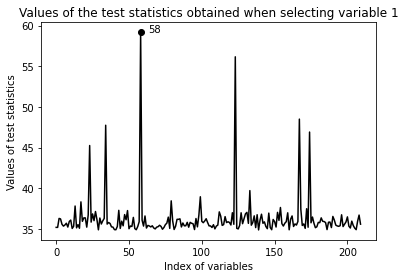

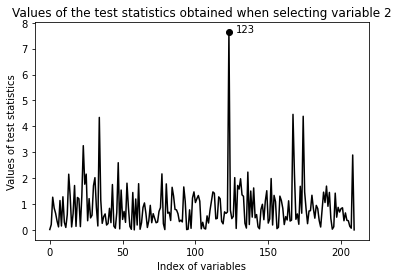

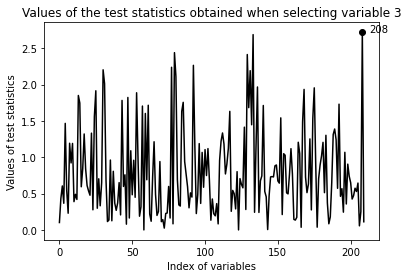

In [26]:
def plot_stat(i):
    """
    plots the graph of the test statistics for the chosen variable 
    at a certain step
    """
    plt.plot(array_test_statistics[i,:], ls='-',color="black")
    first = S[i]
    plt.plot(first, array_test_statistics[i,first], 'o', color="black")
    plt.annotate(str(first), (first + 5, array_test_statistics[i,first]))
    plt.xlabel("Index of variables")
    plt.ylabel("Values of test statistics")
    plt.title(f'Values of the test statistics obtained when selecting variable {i+1}')
    plt.show()
plot_stat(0)
plot_stat(1)
plot_stat(2)

In [27]:
S, array_p_values, array_test_statistics = forward_variable_selection_stop(X_train_s, Y_train, 1)
print("List of selected variables with stopping criterion : ", S)

List of selected variables with stopping criterion :  [58, 123, 208, 133, 129, 13, 77, 92, 34, 152, 31, 131, 59, 196, 135, 102, 167, 56, 60, 63, 110, 130, 99, 138, 97, 53, 169, 69, 36, 79, 21, 174, 122, 51, 61, 159, 49, 74, 75, 12, 202, 95, 112, 163, 191, 204, 81, 23, 193, 147, 183, 55, 24, 108, 8, 14, 103, 19, 115, 197, 118, 71, 88, 155, 139, 83, 141, 30, 182, 168, 2, 154, 6, 149, 104, 181, 18, 199, 101, 57, 165, 93, 134, 50, 64, 65, 188, 78, 180, 136, 85, 146, 25, 87, 28, 15, 172, 171, 156, 37, 22, 201, 119, 9, 73, 38, 162, 144, 120, 32, 41, 5, 194, 125, 113, 117, 145, 43, 67, 205, 148, 84, 206, 192, 127, 161, 7, 158, 10, 106, 46, 39, 94, 203, 140, 151, 70, 128, 190, 200, 186, 185, 3, 96, 175, 164, 16, 40, 27, 105, 48, 160, 44, 54, 90, 111, 1, 45, 198, 26, 132, 114, 72, 177, 29, 91, 195, 207, 76, 20, 179, 142, 143, 209, 121, 42, 109, 52, 173, 153, 166, 62, 100, 89, 184, 176, 0, 86, 178, 82, 189, 107, 124, 126, 66, 47, 4, 116, 33, 35, 11, 187, 98, 157, 150, 170, 68, 80, 17, 137]


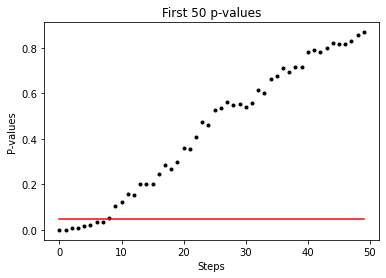

In [28]:
#On the same plot, trace the horizontal line with the ordinate 0.05. Finally, provide the list of the selected variables.
for i in range(50):
    index = S[i]
    plt.plot(i,array_p_values[i,index], '.', color="black")
plt.plot([i for i in range(50)],[0.05 for i in range(50)], color="red")
plt.xlabel("Steps")
plt.ylabel("P-values")
plt.title("First 50 p-values")
plt.show()

We can notice that the p-values are not always non-increasing. This could be due to some errors when computing the test statistic and the residuals which would make he test statistic not always non-decreasing. If the test statistic increases, the p-value descreases.

## 13. Run OLS on the selected variables

In [29]:
#apply the OLS of the sklearn library.
index_variables = [58, 123, 208, 133, 129, 13, 77, 92]
X_train_sel = pd.DataFrame(X_train)[index_variables]
X_test_sel = pd.DataFrame(X_test)[index_variables]

scaler_sel = StandardScaler()
X_train_s = scaler_sel.fit_transform(X_train_sel)
X_test_s = scaler_sel.transform(X_test_sel)

#Apply the linear regression of the sklearn library to the data,
reg_sel = LinearRegression(fit_intercept=True)
reg_sel.fit(X_train_sel,Y_train)
Y_pred_sel = reg_sel.predict(X_test_sel)

#print score
print("The score for the linear regression is : ",reg_sel.score(X_train_s, Y_train))
print("The intercept is :", reg_sel.intercept_)

#print the determination coefficient and the MSE of the test data
print("\nDetermination coefficient = ", determination_coefficient(Y_test, Y_pred_sel))
print("Mean Squared Error : ", MSE(Y_test, Y_pred_sel))

#add a column named FVS to the df_test dataframe that contains the predicted values for the sample
df_coef['FVS'] = np.zeros(210)
df_test['FVS'] = Y_pred_sel

#add a column named FVS to the df_coef dataframe that contains the estimated coefficients
df_coef['FVS'][index_variables] = reg_sel.coef_

The score for the linear regression is :  0.5578358205559417
The intercept is : 153.13977749373717

Determination coefficient =  0.23149977680065614
Mean Squared Error :  3815.152961799496


The OLS on the selected variables does not work very well since that we obtain a determination coefficient lower that before.

In [30]:
index_variables = S[:40]
X_train_sel = pd.DataFrame(X_train)[index_variables]
X_test_sel = pd.DataFrame(X_test)[index_variables]

scaler_sel = StandardScaler()
X_train_s = scaler_sel.fit_transform(X_train_sel)
X_test_s = scaler_sel.transform(X_test_sel)

#Apply the linear regression of the sklearn library to the data,
reg_sel = LinearRegression(fit_intercept=True)
reg_sel.fit(X_train_sel,Y_train)
Y_pred_sel = reg_sel.predict(X_test_sel)

#print score
print("The score for the linear regression is : ",reg_sel.score(X_train_s, Y_train))
print("The intercept is :", reg_sel.intercept_)

#print the determination coefficient and the MSE of the test data
print("\nDetermination coefficient = ", determination_coefficient(Y_test, Y_pred_sel))
print("Mean Squared Error : ", MSE(Y_test, Y_pred_sel))

The score for the linear regression is :  0.6149492417778282
The intercept is : 153.29213850695132

Determination coefficient =  0.3009547493362982
Mean Squared Error :  3470.3497513620096


We can see that by keeping the right number of variables, we can improve the score. Thus, we should consider taking another p-value for forward variable selection.

## 14. Summarize the results of all the methods 

In [31]:
#dataframe df_coef
df_coef

,OLS,Lasso,Ridge,FVS
0,-5.116705e+13,-0.000000,0.009518,0.000000
1,-7.599942e+14,0.000000,0.551303,0.000000
2,1.360104e+15,0.000000,0.464341,0.000000
3,-2.680217e+15,0.000000,0.241559,0.000000
4,8.887619e+14,-0.000000,-1.022428,0.000000
...,...,...,...,...
205,-2.757070e+15,-0.000000,0.105874,0.000000
206,3.280536e+15,0.000000,-0.069593,0.000000
207,1.812461e+14,-0.000000,-0.586012,0.000000
208,-1.242585e+15,1.691384,1.960742,7.734073


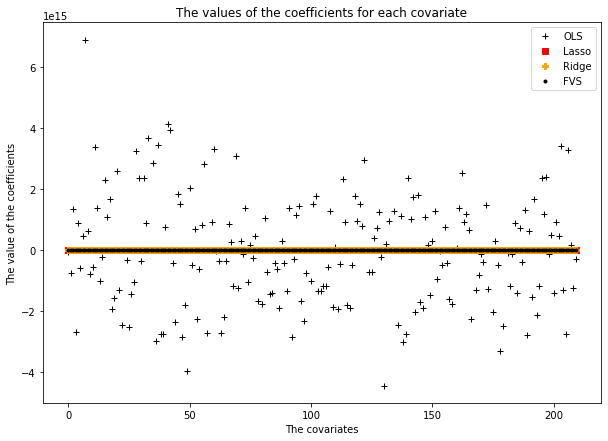

In [32]:
#Compare the values of the coefficients from the different methods by plotting df_coef.
plt.figure(figsize=(10,7))
plt.plot(df_coef["OLS"], '+',color="black", label="OLS")
plt.plot(df_coef["Lasso"], 's',color="red", label="Lasso")
plt.plot(df_coef["Ridge"], 'P',color="orange", label="Ridge")
plt.plot(df_coef["FVS"], '.',color="black", label="FVS")
plt.title("The values of the coefficients for each covariate")
plt.xlabel("The covariates")
plt.ylabel("The value of the coefficients")
plt.legend()
plt.show()

It can be seen that the coefficients of OLS are by far greater that the coefficients of other regression methods (Ridge, Lasso, FVS), so much so that we can not see anything on the graph, except the values of the OLS coefficients. I chose to plot the other methods on a different graph. 

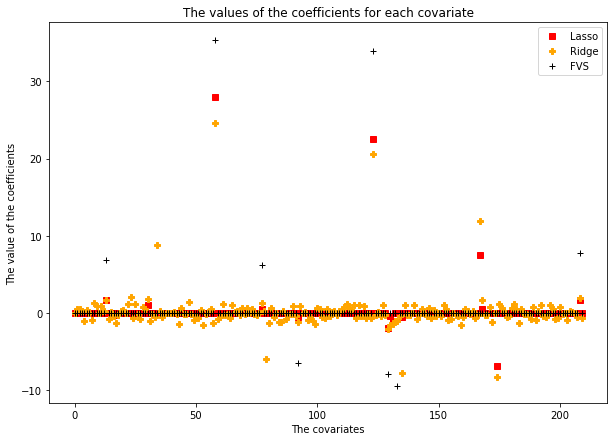

In [33]:
plt.figure(figsize=(10,7))
plt.plot(df_coef["Lasso"], 's',color="red", label="Lasso")
plt.plot(df_coef["Ridge"], 'P',color="orange", label="Ridge")
plt.plot(df_coef["FVS"], '+',color="black", label="FVS")
plt.title("The values of the coefficients for each covariate")
plt.xlabel("The covariates")
plt.ylabel("The value of the coefficients")
plt.legend()
plt.show()

We can observe that the regression method seem to have the same large coefficients, as shown by the markers being on the same line. This is indeed true for covariate 58, 123, 208 and 13 for example. Furthermore, in these cases, FVS has the largest coefficient, followed by Lasso and then Ridge. 

It can also be seen that, while FVS and Laso have set most of the coefficients to zero, it is not the case for Ridge, eventhough these coefficients are very close to zero.

## 15. How many coefficients are set exactly to zero by each of the methods considered in the data frame df_coef? 


In [34]:
def count_zero(s):
    count = 0
    for i in range(210):
        if (df_coef[s][i] == 0):
            count +=1
    return(count)

print("Number of zeros for Lasso : ",count_zero("Lasso"))
print("Number of zeros for Ridge: ",count_zero("Ridge"))
print("Number of zeros for OLS : ",count_zero("OLS"))
print("Number of zeros FVS : ",count_zero("FVS"))

Number of zeros for Lasso :  195
Number of zeros for Ridge:  0
Number of zeros for OLS :  0
Number of zeros FVS :  202


### Why is the number of coefficients set to 0 so different for Lasso and Ridge?


On one hand, in Ridge regression, we add a penalty term which is equal to the square of the coefficient multiplied by a constant. On the other hand, in Lasso regression, we add a penalty term which is equal to the absolute sum of the coefficients multiplied by a constant. 

The difference between the number of zeros in the method is due the topological difference of the norm L1 and L2. On the one hand, the L1 norm is a diamond in 2D and the best coefficient is given by the intersection the function and the corner of the diamond which causes a component to be equal to zero. On the other hand, the L2 norm forms a circle in 2D and the intersection can be anywhere on the circle so one of the component is not necessarily equal to zero. The case in dimension 2 can be generalized to more dimensions. 

## 16. Give a pairplot of the df_test dataframe. 


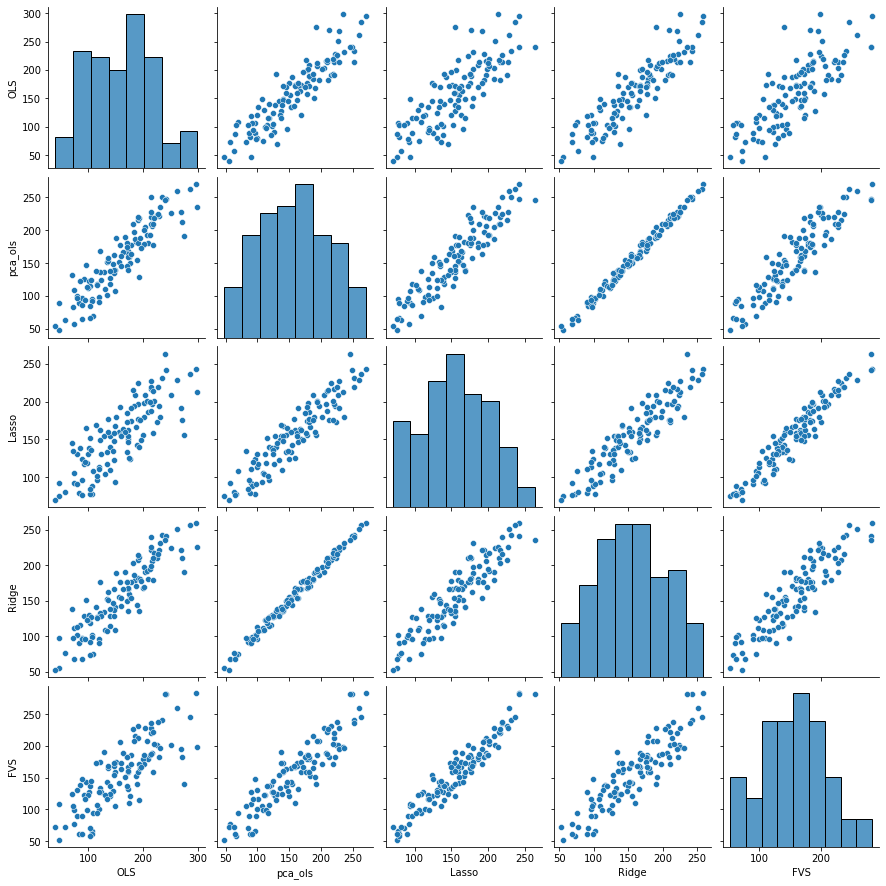

In [35]:
sns.pairplot(df_test)
plt.show()

We can observe that Ridge et PCA before OLS seem to be strongly correlated while Lasso and FVS seem to be correlated.

If we want to predict the value of a new, unseen data point x, we compute : $x^T \theta^{Lasso}$

Indeed, the Lasso method is the fastest (most of the coefficients are set to zeros) and most precise method since it had the best determination coefficient.

## 17. Confidence intervals and bootstrapping


In [36]:
#Load diabetes
from sklearn.datasets import load_diabetes
data, y = load_diabetes(return_X_y=True)

#let X be the 3rd column of the loaded data 
X_bis = data[:,2]
X = data[:,2].reshape(-1, 1)

#Give the OLS coefficient for the slope
reg = LinearRegression(fit_intercept=True)
results = reg.fit(X, y)
print("the score for the linear regression is : ",reg.score(X, y))
print("the intercept is :", reg.intercept_)
print("----------------------------------")
print( "Q : Give the OLS coefficient for the slope")
print("R : the coeff is", reg.coef_[0])

the score for the linear regression is :  0.3439237602253803
the intercept is : 152.1334841628967
----------------------------------
Q : Give the OLS coefficient for the slope
R : the coeff is 949.4352603839491


### Confidence interval for regression coefficients

The formula for confidence interval on the regression coefficients are given by Sample estimate ± (t-multiplier × standard error), that is

- for the slope $\theta_1$
$$
\theta_{1} \pm t_{(\alpha / 2, n)} \times\left(\frac{\sqrt{M S E}}{\sqrt{\sum\left(x_{i}-\bar{x}\right)^{2}}}\right)
$$
- for the intercept $\theta_0$
$$
\theta_{0} \pm t_{\alpha / 2, n} \times \sqrt{M S E} \sqrt{\frac{1}{n}+\frac{\bar{x}^{2}}{\sum\left(x_{i}-\bar{x}\right)^{2}}}
$$

where $t_{\alpha / 2, n-2}$ is the quantile function of Student's t-distribution with n degrees of freedom.


In [37]:
#Code manually the expression for the confidence intervals and evaluate it for α = 0.05
import scipy.stats as stat

def CI(alpha=0.05, theta= reg.coef_[0], b = reg.intercept_, X=X_bis):
    
    # size of X
    n=len(X)
    
    #compute the quantile
    t_multiplier = stat.t.ppf(1-alpha/2, n)

    #compute mse, mean, sum of res
    mse  = MSE(y, b + theta*X)
    X_mean = np.mean(X)
    xx = np.sum((X - X_mean)**2)
    
    #compute the standard error for the slope
    error_slope = mse / xx
    const_slope = np.sqrt(error_slope) * t_multiplier
    
    #compute the standard error for the intercept
    error_intercept = mse * (1/n + X_mean**2/xx)
    const_intercept = np.sqrt(error_intercept) * t_multiplier
    
    #compute confidence intervals
    low_intercept, up_intercept = b-const_intercept, b+const_intercept
    low_coeff, up_coeff = theta-const_slope, theta+const_slope

    print("Confidence interval for the intercept : ", [low_intercept, up_intercept])
    print("Confidence interval for the slope : ",[low_coeff,up_coeff])

#print confidence intervals
CI(alpha=0.05, theta= reg.coef_[0], b = reg.intercept_, X=X_bis)

#Checking results
import statsmodels.api as sm
X_truc = sm.add_constant(X)
mod = sm.OLS(y, X_truc)    # Describe model
res = mod.fit() # Fit model
print("\n")
print(res.summary())

Confidence interval for the intercept :  [146.30268502675796, 157.96428329903546]
Confidence interval for the slope :  [826.8497285860751, 1072.020792181823]


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 16 Feb 2022   Prob (F-statistic):           3.47e-42
Time:                        23:58:15   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P

In [38]:
import random

#We denote the concatenation of X and y as Xy.
Xy = np.column_stack((data[:,2],y))

#function sample
def sample(Xy):
    sample_list = random.choices(range(442), k=442)
    sample = [ Xy[i] for i in sample_list]
    X_sample = np.array([Xy[i][0] for i in sample_list]).reshape(-1,1)
    y_sample = np.array([Xy[i][1] for i in sample_list]).reshape(-1,1)
    return X_sample, y_sample


The bootstrap CI is :  [873.1669971440272, 989.1210901537605]
The bootstrap CI is :  [854.6641179438387, 1044.7844472352567]
The bootstrap CI is :  [857.1450340954119, 1034.7447270655198]
The bootstrap CI is :  [855.6354145441937, 1045.9794255211525]
The bootstrap CI is :  [848.621711165147, 1048.8095492648297]
The bootstrap CI is :  [857.4739588001722, 1037.2793437470295]
The bootstrap CI is :  [847.2911314117068, 1045.7455164170237]
The bootstrap CI is :  [857.200048627415, 1045.0386448539416]
The bootstrap CI is :  [855.030386706354, 1043.990046144843]
The bootstrap CI is :  [852.2184545846075, 1041.9086113144135]
The bootstrap CI is :  [857.2067705968598, 1039.6831290336486]
The bootstrap CI is :  [858.0568874354965, 1043.8865899857876]
The bootstrap CI is :  [858.9271166134088, 1040.8124139140182]
The bootstrap CI is :  [859.2036269447026, 1043.6866824664212]
The bootstrap CI is :  [853.1422673439442, 1043.679366246828]
The bootstrap CI is :  [855.3951074834513, 1039.4505139284965

Text(0.5, 1.0, 'Confidence intervals')

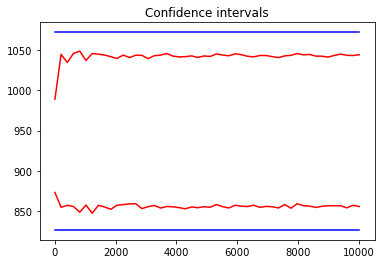

In [39]:
#Generate k bootstrap samples from Xy, for k=np.linspace(10,10000).
k = np.linspace(10,10000, dtype=int)
err = []
X_low = []
X_up = []
for n in k :
    S = []
    for i in range(n):
        X_sample, y_sample = sample(Xy)
        reg = LinearRegression(fit_intercept=True)
        results = reg.fit(X_sample, y_sample)
        #estimate the parameter
        S.append(reg.coef_[0])

    #get an approximation of the CI by getting the (α, 1 ´ α) percentile of the values in step
    a = np.array(S)
    low = np.quantile(a,0.05)
    up = np.quantile(a,0.95)
    print("The bootstrap CI is : ", [low,up])
    moy = (low+up)/2
    real_CI = [826.570, 1072.301]
    X_low.append(low)
    X_up.append(up)

plt.plot(k, X_up, color="red")
plt.plot(k, X_low, color="red", label="CI estimated with bootstrapping")
plt.plot(k, [826.570 for i in k], color="blue", label = "Real CI")
plt.plot(k, [1072.301 for i in k], color="blue")  
plt.title("Confidence intervals")

The interval obtained with bootstrapping seem to be smaller than the real interval.

### Does the CI increase with α? Why?

For a fixed number of samples, the size of the confidence interval increases as the level of confidence (1-$\alpha$) increases. This is beacause, as the confidence level decreases, the t-multiplier decreases. Therefore, if we decrease our confidence level, we decrease the width of our interval.This is because a larger interval is required to be more confident and to make less errors. Thus, the CI increases when $\alpha$ decreases.

In [40]:
for i in range(1,6):
    CI(alpha=0.05*i, theta= reg.coef_[0], b = reg.intercept_, X=X_bis)
for i in range(1,6):
    CI(alpha=0.05/i, theta= reg.coef_[0], b = reg.intercept_, X=X_bis)

Confidence interval for the intercept :  [array([144.85138696]), array([156.51646143])]
Confidence interval for the slope :  [array([836.64131739]), array([1081.88546404])]
Confidence interval for the intercept :  [array([145.79225533]), array([155.57559306])]
Confidence interval for the slope :  [array([856.42194227]), array([1062.10483916])]
Confidence interval for the intercept :  [array([146.40440373]), array([154.96344466])]
Confidence interval for the slope :  [array([869.2916254]), array([1049.23515603])]
Confidence interval for the intercept :  [array([146.87498307]), array([154.49286532])]
Confidence interval for the slope :  [array([879.18498941]), array([1039.34179202])]
Confidence interval for the intercept :  [array([147.26555125]), array([154.10229714])]
Confidence interval for the slope :  [array([887.3962152]), array([1031.13056623])]
Confidence interval for the intercept :  [array([144.85138696]), array([156.51646143])]
Confidence interval for the slope :  [array([836.